In [1]:
# Translate "PlotAnalyticalModel_v2.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

$\tau_{2min} = \frac{f_{rupt}}{k\times V_{max}}$

$\tau = \frac{\tau_1}{\tau_{2min}}$ <br>

$f = \frac{f_{rupt}}{f_{stall}}$ <br>

$\gamma = \frac{1}{R_{temp}} - 1$

$\gamma_{crit} = (1 + \tau)^2\times \frac{f\times \tau}{2}$

$R_{crit} = \frac{1}{\gamma_{crit} + 1}$

$V_+ = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 + \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

$V_- = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 - \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

In [2]:
Vmax = 7;           # Maximum gliding speed (um/s)
k = 300.0;          # Spring constant (pN/um)
fstall = 0.4;       # Stall force (pN)
#frupt = 9.2;        # Rupture force (pN)

ActiveMotorRatio = []; Vplus = []; Vminus = []
R = []; Vp = []; Vm = []

for frupt in [2.0,4.0,6.0,8.0,9.2]:
    Tau1 = 0.025 # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
    Tau2min = frupt/k/Vmax

    ActiveMotorRatioTemp = np.arange(0.01,1,0.01) # 0.99

    Tau = Tau1/Tau2min
    f = frupt/fstall
    Gamma = 1.0/ActiveMotorRatioTemp - 1.0

    GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
    ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

    #===================================================

    for I in range(len(Gamma)):
        if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
            Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
    R.append(ActiveMotorRatio)
    Vp.append(Vplus)
    Vm.append(Vminus)
    ActiveMotorRatio = []; Vplus = []; Vminus = []

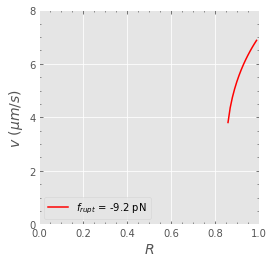

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[4],Vp[4],'r-', label='$f_{rupt}$ = %.1f pN'%-9.2) #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')
ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$R$', fontsize=14)
ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend(loc='lower left')

#plt.savefig('fig/gldn_spd.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')
plt.show()

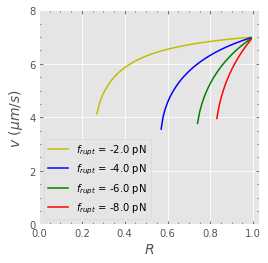

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[0],Vp[0], 'y-', label='$f_{rupt}$ = %.1f pN'%-2.0)
ax.plot(R[1],Vp[1], 'b-', label='$f_{rupt}$ = %.1f pN'%-4.0)
ax.plot(R[2],Vp[2], 'g-', label='$f_{rupt}$ = %.1f pN'%-6.0)
ax.plot(R[3],Vp[3], 'r-', label='$f_{rupt}$ = %.1f pN'%-8.0)

ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$R$', fontsize=14)
ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend()

#plt.savefig('fig/gldn_spds.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spds.png', format='png', dpi=700, bbox_inches='tight')
plt.show()